# Heat Flux from Propellant (Open Burn, Top Down)
## Question: What's a safe distance from a burning propellant mass in terms of heat flux?
***
## Approach: Estimate the safe distance from test data
This notebook treats the heat flux and its estimation based on open burning of propellant in drums or in fires. NOT TREATED HERE are the results from a bottom ignition or an explosion where the burn varies significantly from a somewhat stead state top down or perimeter to center of a collection of propellant. Or in other words, explosions are not treated hear or where the propellant is ejected up into the air and subsequently rapidly burns. Clint Guymon, Safety Management Services, Inc.

## Necessary code and data import

In [1]:
#Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea

### Import data

The majority of the heat flux data is from "Scaling Studies of Thermal Radiation Flux from Burning Propellants" by J. Hay and R.W. Watson of Bureau of Mines as commissioned by the DDESB in 1992. Various propellant types and masses were tested in a top down burn or external fire of a single barrel or package of propellant.

In [2]:
df = pd.read_csv('jupyterfiles/heatfluxdata.csv')

In [3]:
#add new column for unique id = ref id + test id
df['Unique ID'] = df.agg('R{0[Reference ID]}T{0[Test #]}'.format, axis=1)
#add column for burn rate
burnRate = df.groupby('Unique ID').apply(lambda x: (np.percentile(x['Mass, kg']/x['Burn time, sec'],75)))
burnRate.name = 'Burn rate, kg/s'
df['Burn rate, kg/s'] = df['Unique ID'].apply(lambda x:burnRate.loc[x])

### Data summary

In [4]:
summary = df.groupby('Reference ID')['Reference'].unique().to_frame()
summary['Propellant types'] = df.groupby('Reference ID')['Propellant type'].unique()
summary['# of Tests'] = df.groupby('Reference ID')['Test #'].nunique()
summary

,Reference,Propellant types,# of Tests
Reference ID,,,
1,"[DDESB BOM ""SCALING STUDIES OF THERMAL RADIATI...","[IMR5010, M1-8-SP, M1-8-MP, WC844, WC846, WCBl...",49
2,"[TNO T 1022 ""Thermal Radiation of Fireworks"" 1...",[Fireworks],16
3,[DDESB IIT Research Institute R. Pape T. Water...,"[M1, WC844]",46
4,"[SMS C. Guymon ""Heat flux from the Top Ignitio...",[WC814],1


In [5]:
#References
for i,each in enumerate(set(df['Reference'])):
    print(i,":",each) 

0 : DDESB BOM "SCALING STUDIES OF THERMAL RADIATION FLUX FROM BURNING PROPELLANTS" Hay and Watson 1992
1 : SMS C. Guymon "Heat flux from the Top Ignition of a Single Barrel of WC814" TEAD 2020
2 : TNO T 1022 "Thermal Radiation of Fireworks" 1984
3 : DDESB IIT Research Institute R. Pape T. Waterman A. Takata "Fire Hazards from Combustible Ammunition, Methodology Development (Phase I)" 1980


In [6]:
#propellant types
set(df['Propellant type'])

{'Fireworks',
 'IMR5010',
 'M1',
 'M1-8-MP',
 'M1-8-SP',
 'WC814',
 'WC844',
 'WC846',
 'WCBlank'}

In [7]:
#number of tests for each propellant
df.groupby('Propellant type')['Test #'].nunique()

Propellant type
Fireworks    16
IMR5010      13
M1           23
M1-8-MP      12
M1-8-SP      14
WC814         1
WC844        27
WC846         3
WCBlank       3
Name: Test #, dtype: int64

In [8]:
#total number of heat flux measurements
len(df)

305

In [9]:
df.describe() #summary statistics for numerical data

,Reference ID,"Mass, kg","Distance, m","Peak heat flux, cal/cm2/sec","Average heat flux, cal/cm2/sec","Burn time, sec","total heat radiated, Mcal","Drum diameter, cm","Burn rate, kg/s"
count,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,154.000000,305.000000
mean,1.609836,71.304797,8.791180,0.499913,0.194628,32.502659,39.190052,59.376623,3.122141
std,0.915097,69.841089,5.369148,0.679690,0.252335,32.096020,43.939426,3.829841,2.619198
min,1.000000,0.340000,1.070000,0.001505,0.000579,3.500000,0.005000,36.000000,0.028333
25%,1.000000,45.400000,4.270000,0.064740,0.030000,15.000000,12.700000,60.000000,1.408000
50%,1.000000,49.900000,8.000000,0.263000,0.093000,22.000000,22.100000,60.000000,2.907051
75%,3.000000,95.300000,15.000000,0.612000,0.247000,36.000000,61.500710,60.000000,3.942029
max,4.000000,399.200000,20.000000,5.800000,1.402857,215.000000,229.200000,60.000000,20.000000


In [10]:
df.head(3) #first 3 rows of the data frame

,Reference ID,Reference,Propellant type,Test #,"Mass, kg","Distance, m","Peak heat flux, cal/cm2/sec","Average heat flux, cal/cm2/sec","Burn time, sec","total heat radiated, Mcal",Notes,"Drum diameter, cm",Unique ID,"Burn rate, kg/s"
0,1,"DDESB BOM ""SCALING STUDIES OF THERMAL RADIATIO...",IMR5010,1,45.4,3.2,1.750,0.482,35.0,13.8,Barrel,60.0,R1T1,1.297143
1,1,"DDESB BOM ""SCALING STUDIES OF THERMAL RADIATIO...",IMR5010,1,45.4,4.0,1.050,0.329,35.0,13.8,Barrel,60.0,R1T1,1.297143
2,1,"DDESB BOM ""SCALING STUDIES OF THERMAL RADIATIO...",IMR5010,1,45.4,5.0,1.068,0.289,35.0,13.8,Barrel,60.0,R1T1,1.297143


### Calculate a "Safe distance"

Calculate a safe distance based on the average heat flux observed in all of the tests to determine the parameters of the Point Source Model:
\begin{align}
q = \frac{\alpha}{r^2}
\end{align}

After determining the array of alphas for each test (based on the average heat flux), calculate the distance that yields a heat flux of 0.3 cal/cm2/sec which is the cutoff per DOD 6055 and 4145 per sections C4.4.5 and C5.7.1.3, respectively. The average heat flux here is used instead of the peak heat flux as the peak heat flux is a short term event: less than 5 seconds.

In [11]:
pso = 2 #normal point source drops off to the second power
hfm = 0.3 #cal/cm2/s max heat flux for safe exposure

In [12]:
safeDistance = df.groupby('Unique ID').apply(lambda x: (np.percentile(x['Average heat flux, cal/cm2/sec']*
                                                                   x['Distance, m']**pso,75)/hfm)**(1/pso))

In [13]:
df['Safe distance, m'] = df['Unique ID'].apply(lambda x:safeDistance.loc[x])

## Summary plots

In [14]:
sea.set_palette(sea.color_palette("Paired"))

In [15]:
bins = np.array([0.1, 20, 70, 160, 280, 500])
df['Mass bin, kg'] = pd.cut(df['Mass, kg'], bins)

The below plots show the average or peak heat flux from all tests as a function of distance.

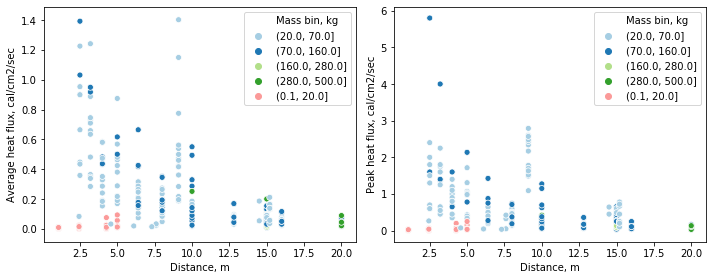

In [16]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
sea.scatterplot(df['Distance, m'],df['Average heat flux, cal/cm2/sec'],hue=df['Mass bin, kg'],ax=ax[0])
sea.scatterplot(df['Distance, m'],df['Peak heat flux, cal/cm2/sec'],hue=df['Mass bin, kg'],ax=ax[1])
plt.tight_layout()
plt.show()

In [17]:
dfsub = df.drop(['Reference ID','Test #','Propellant type','Drum diameter, cm',
                 'Reference','Notes','Unique ID','Distance, m'],axis=1) #remove columns with strings

The below pair plot shows each variable plotted against the others with the color scheme based on the mass bins above.

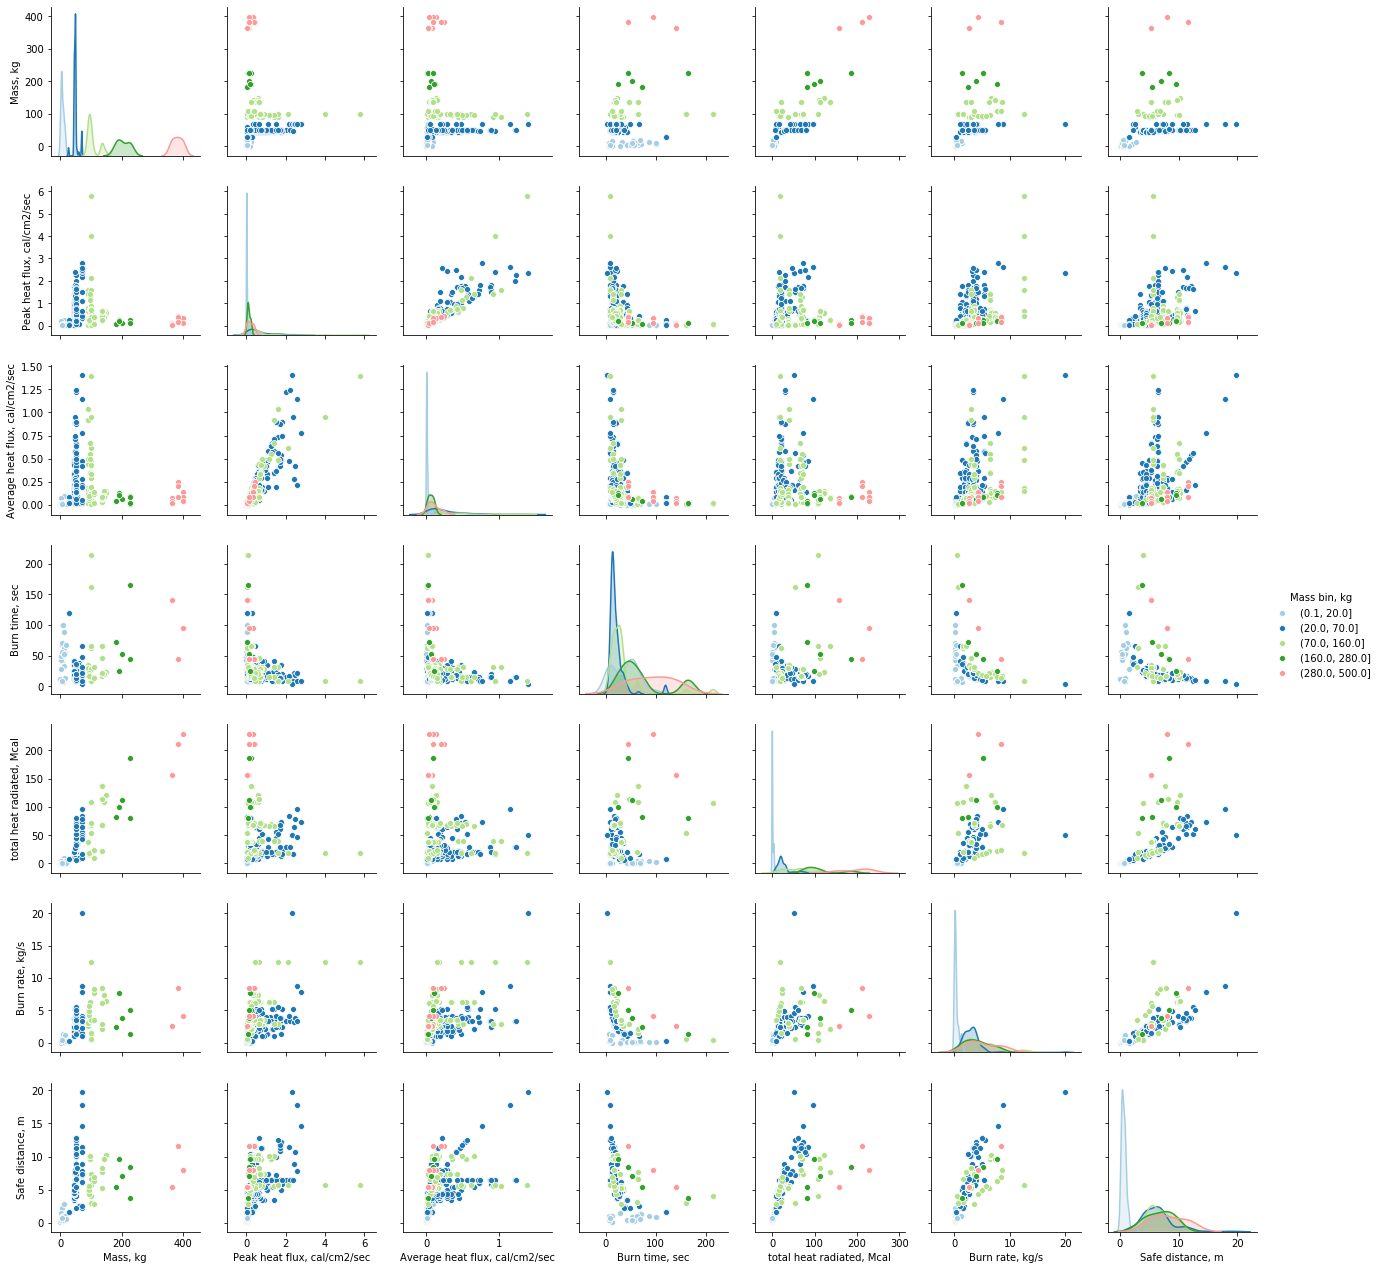

In [18]:
sea.pairplot(dfsub, hue="Mass bin, kg")
plt.show()

From the above pair plot there are a number of apparrent correlations: <br>
  - peak heat flux is proportional to average heat flux
  - total heat radiated is inversly proportional to average and peak heat flux
  - burn time is also inversly proportional to average and peak heat flux
  - safe distance is proportional to the burn rate
  - mass of propellant is proportional to the total heat radiated

## Plot of the Point source parameter versus mass

The plot correlating the point source parameter to mass has been used (see Reference 2) in the past to correlate mass to the heat flux. In this case, the relationship isn't very good. Also plotted on the plot is the suggested correlation to heat flux for propellant per Reference 2. As a reminder, the point source parameter is:
\begin{align}
q & = \frac{\alpha}{r^2}:\> \text{Point source model}\\
\alpha & = q{r^2}:\> \text{Point source parameter}
\end{align}

In [19]:
qR2 = df.groupby('Unique ID').apply(lambda x: (np.percentile(x['Average heat flux, cal/cm2/sec']*10*
                                                                   x['Distance, m']**pso,75)))
pType = df.groupby('Unique ID').apply(lambda x: set(x['Propellant type']).pop())
pMass = df.groupby('Unique ID').apply(lambda x: set(x['Mass, kg']).pop())
qR2.name = 'qR2, kcal/sec'
dfs = qR2.to_frame()
dfs['Burn rate, kg/s']=burnRate;dfs['Safe Distance, m']=safeDistance
dfs['Propellant type']=pType;dfs['Mass, kg']=pMass
dfs = dfs.set_index('Safe Distance, m')

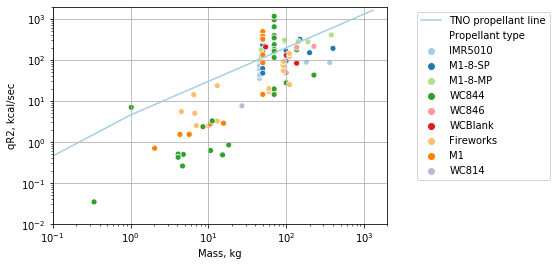

In [20]:
#plot showing the relationship of qR2(kcal/sec) to Mass (kg) on a log-log plot
fig, ax = plt.subplots(1,1,figsize=(6,4))
ax.set_xscale('log'); ax.set_yscale('log')
sea.scatterplot(dfs['Mass, kg'],dfs['qR2, kcal/sec'],hue=dfs['Propellant type'],ax=ax)
x = np.arange(0,1300); y=1.9e4/4184*x**0.82
plt.xlim([0.1,2000]); plt.ylim([0.01,2000])
plt.plot(x,y,label='TNO propellant line')
plt.legend(bbox_to_anchor=(1.5, 1))
plt.grid()
plt.show()

## Plot of the Burn rate versus the Safe distance

The safe distance correlates to the Safe distance calculated above (by definition) and is strongly correlated to the burn rate.  This relationship can be used to predict the safe distance given a burn rate.

Prediction of safe distance based on the burn rate:

In [21]:
factor = np.percentile(safeDistance/(burnRate**(2/3)),75)

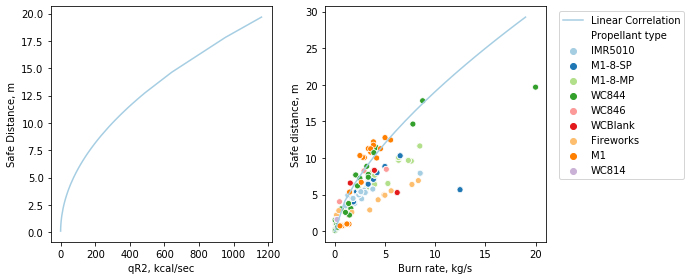

In [22]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
g = sea.lineplot(dfs['qR2, kcal/sec'],dfs.index,ax=ax[0])
sea.scatterplot(df['Burn rate, kg/s'],df['Safe distance, m'],ax=ax[1],hue=df['Propellant type'])
x = np.arange(0,20); y=factor*x**(2/3)
plt.plot(x,y,label='Linear Correlation')
plt.legend(bbox_to_anchor=(1.65, 1))
plt.tight_layout()
plt.show()

# Conclusions

- The point source parameter method to determine the heat flux from mass is not ideal although it has been used.
- The burn rate can be used to estimate in a conservative fashion the safe distance from a top-down burn
    - Although not represented here the safe distance calculated is dependent on the direction, i.e. the burn may be from an open port that would drastically increase the safe distance
- The burn rate is a function of critial parameters
    - Diameter of the burning propellant
    - Particle size of the propellant (smaller is slower for top down scenarios)
    - Ignition parameters (smaller is faster for bottom ignition scenarios such bottom ignition scenarios were NOT treated here

Access notebook online: https://nbviewer.jupyter.org/github/clint-bg/heatflux/blob/master/propellantheatflux.ipynb